## ACTD 2024 - 20

### Clases 11-12: Introducción a redes neuronales

- Redes densas
- Redes para regresión
- Funciones de activación y pérdida

Empecemos importando numpy y pandas

In [102]:
import numpy as np
import pandas as pd

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [103]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Exploremos las primeras filas del dataframe.

In [104]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


- MPG: miles per gallon
- Cylinders: # de cilindros
- Displacement: volumen desplazado por los pistones
- Horsepower: caballos de potencia
- Weight: peso
- Acceleration: aceleración
- Model Year: año/modelo
- Origin: 1:USA, 2:Europa, 3:Japón

Exploremos el tamaño del df

In [105]:
df.shape

(398, 8)

Identificamos NAs en los datos

In [106]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [107]:
df.dropna(inplace=True)

In [108]:
df.shape

(392, 8)

Codifiquemos la variable categórica Origin

In [109]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: object

In [110]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [111]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [112]:
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


In [113]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [114]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


Separamos los datos en entrenamiento y prueba

In [115]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,20.0,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,26.0,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,31.5,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,20.2,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,30.0,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [116]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,0,0,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,0,0,1


In [117]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Realicemos una exploración descriptiva de los datos, calculando inicialmente estadísticas de cada variable continua

In [118]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.579299,5.455414,192.562102,103.767516,2959.312102,15.518471,75.964968,0.171975,0.219745,0.608280
std,7.877216,1.691811,103.701434,38.123560,856.880939,2.705097,3.672110,0.377961,0.414735,0.488914
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,98.000000,75.000000,2193.000000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,94.500000,2764.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.375000,8.000000,260.000000,120.000000,3612.000000,17.000000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


Exploremos relaciones bivariadas con pairplot de seaborn

In [119]:
import seaborn as sns

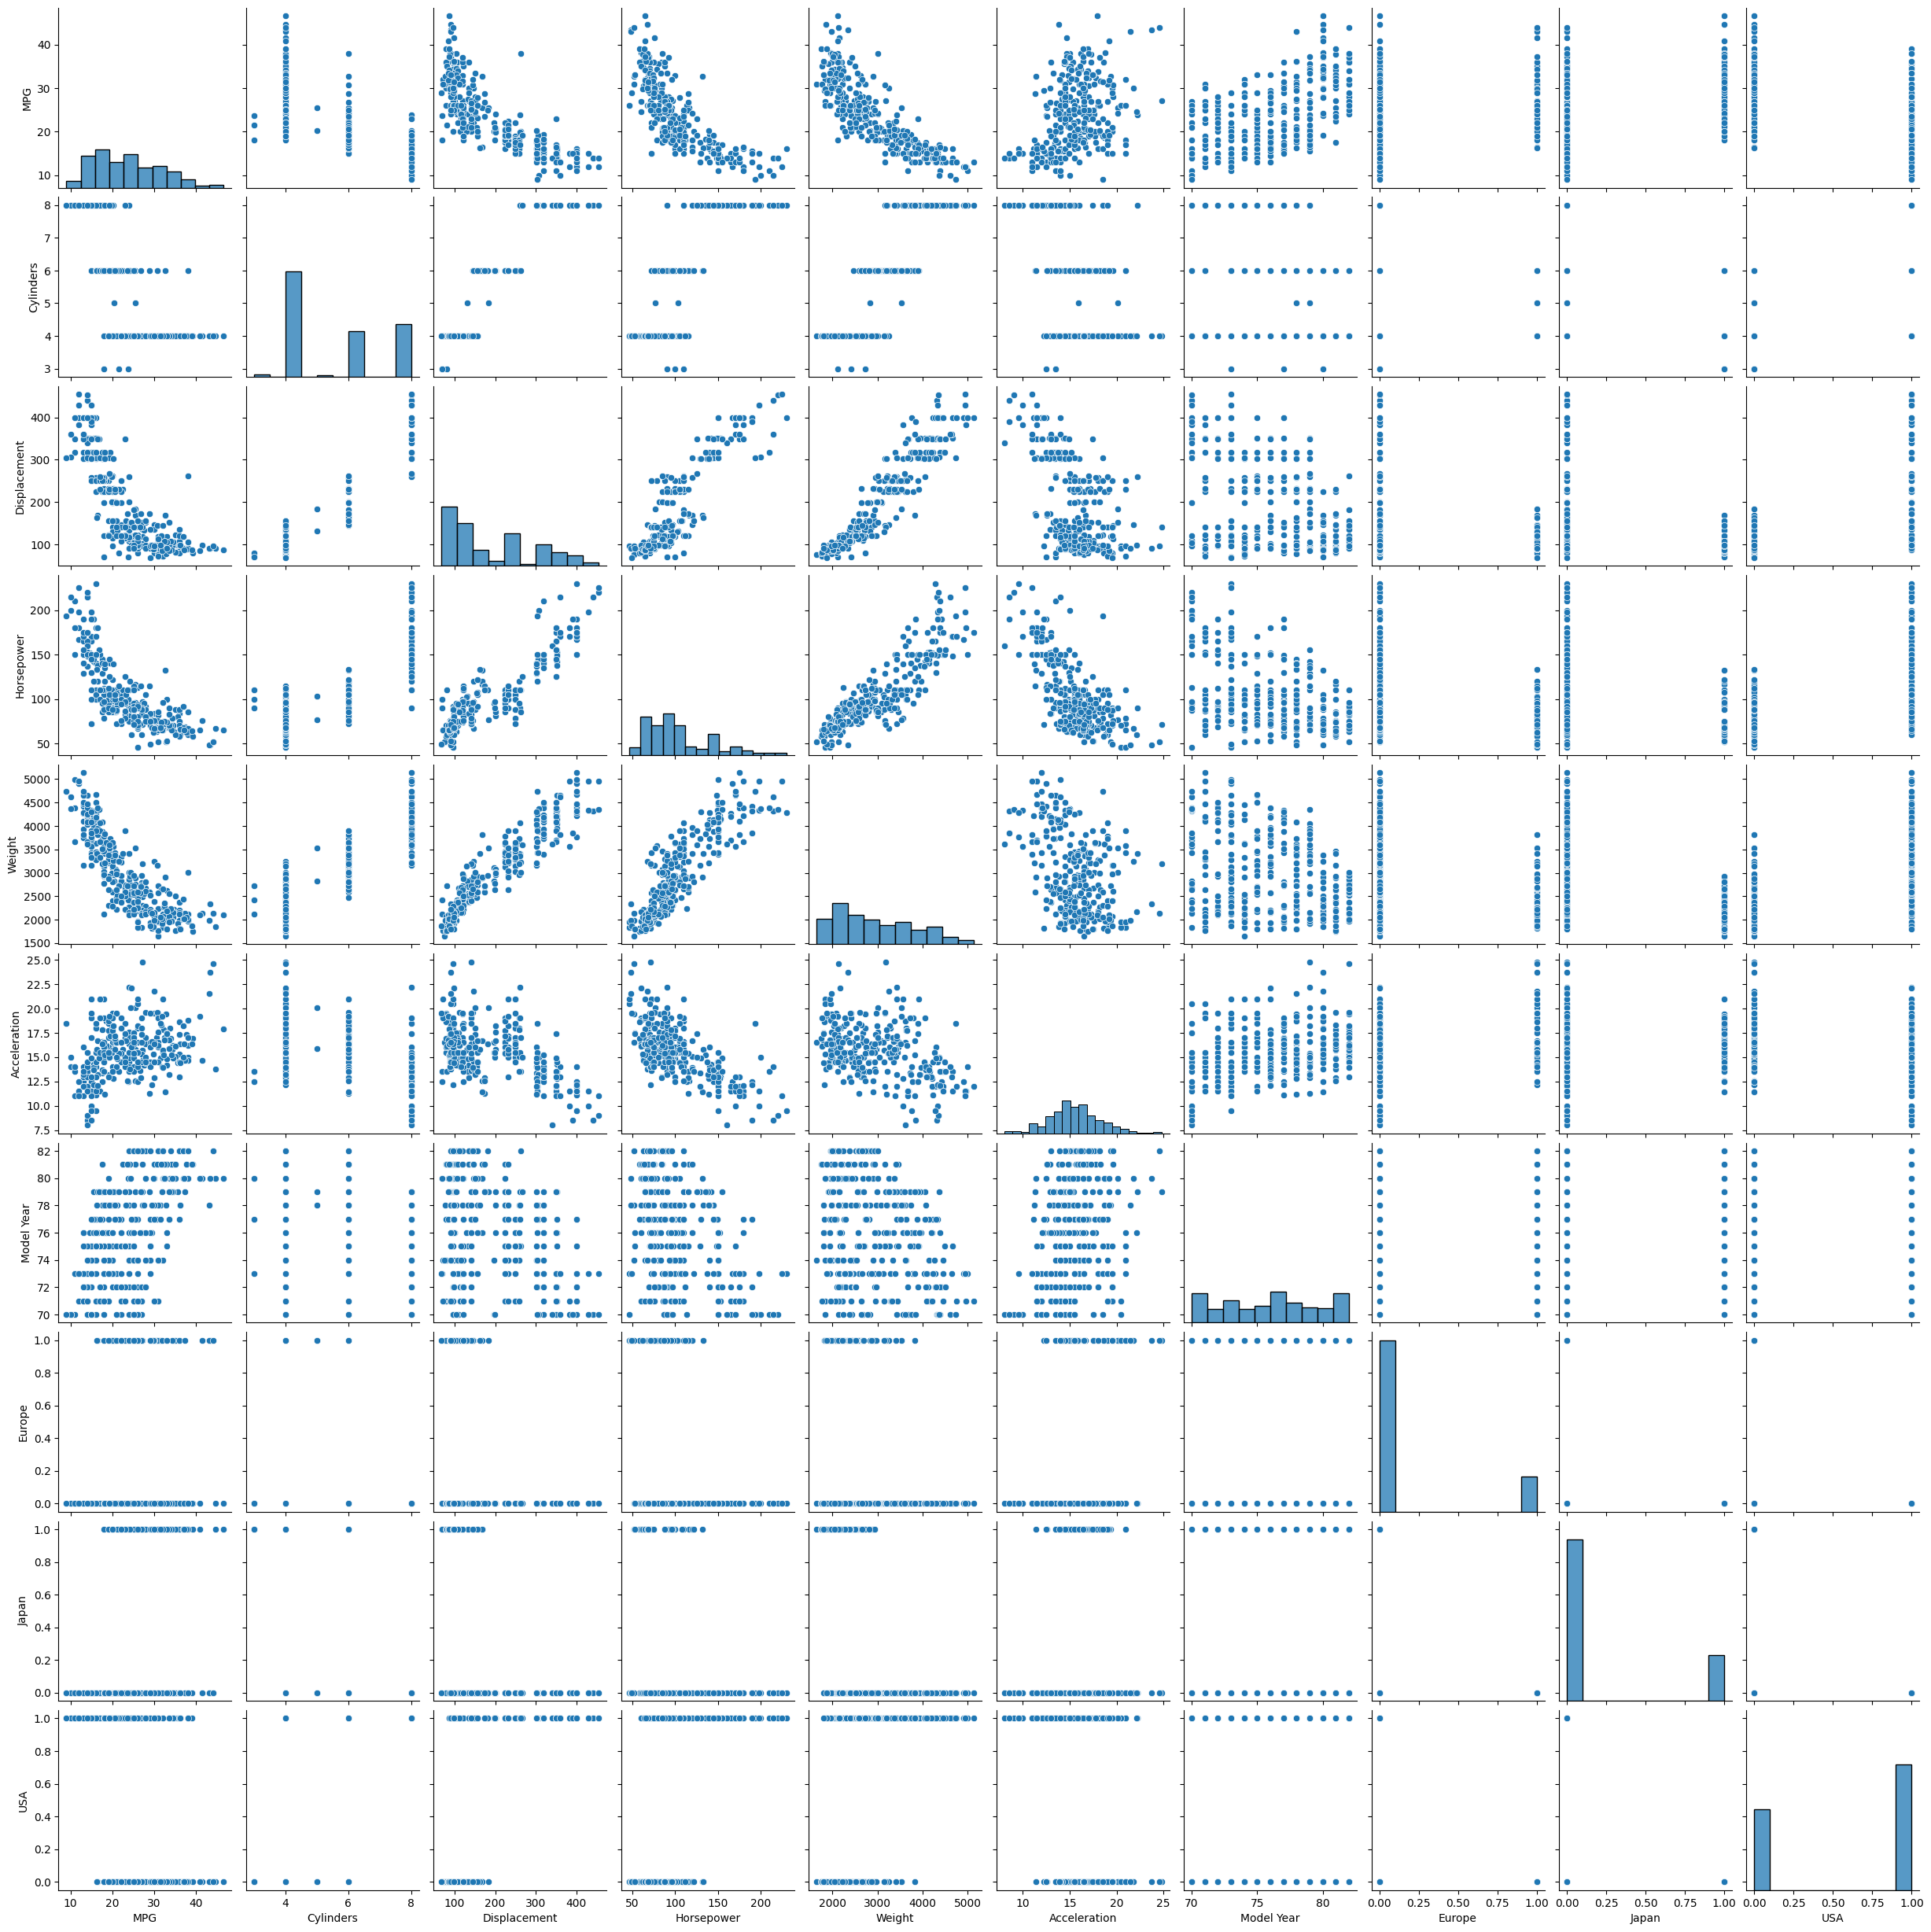

In [120]:
sns.pairplot(train)

Calculemos la matriz de correlacion

In [121]:
train.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
MPG,1.000000,-0.777230,-0.807032,-0.775493,-0.832793,0.389422,0.596816,0.249298,0.455161,-0.578826
Cylinders,-0.777230,1.000000,0.950858,0.849237,0.901259,-0.488703,-0.330668,-0.352708,-0.416286,0.625791
Displacement,-0.807032,0.950858,1.000000,0.893640,0.941913,-0.523473,-0.364236,-0.372541,-0.455127,0.674072
Horsepower,-0.775493,0.849237,0.893640,1.000000,0.875157,-0.672989,-0.414065,-0.291224,-0.327337,0.502808
Weight,-0.832793,0.901259,0.941913,0.875157,1.000000,-0.402870,-0.318231,-0.304870,-0.454284,0.621043
Acceleration,0.389422,-0.488703,-0.523473,-0.672989,-0.402870,1.000000,0.258013,0.195310,0.110850,-0.245018
Model Year,0.596816,-0.330668,-0.364236,-0.414065,-0.318231,0.258013,1.000000,-0.062402,0.237930,-0.153590
Europe,0.249298,-0.352708,-0.372541,-0.291224,-0.304870,0.195310,-0.062402,1.000000,-0.241853,-0.567903
Japan,0.455161,-0.416286,-0.455127,-0.327337,-0.454284,0.110850,0.237930,-0.241853,1.000000,-0.661311
USA,-0.578826,0.625791,0.674072,0.502808,0.621043,-0.245018,-0.153590,-0.567903,-0.661311,1.000000


<Axes: >

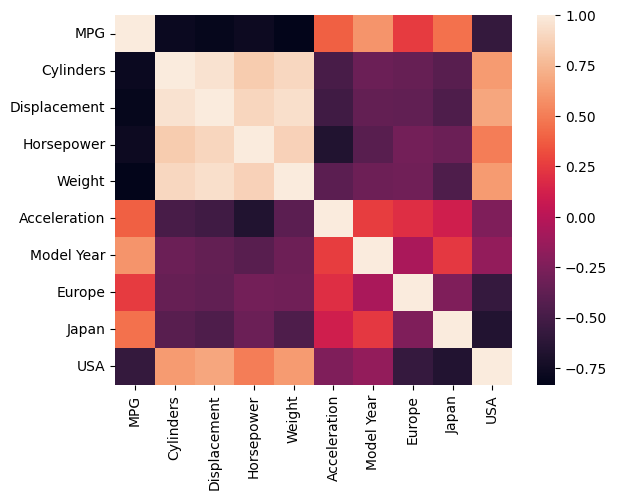

In [122]:
sns.heatmap(train.corr())

Seleccionamos ahora las características y las etiquetas (MPG)

In [123]:
train_X = train.copy()
test_X = test.copy()

In [124]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [125]:
train_X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [126]:
train_y.head()

125    20.0
142    26.0
278    31.5
254    20.2
328    30.0
Name: MPG, dtype: float64

In [127]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe            int32
Japan             int32
USA               int32
dtype: object

Construyamos los modelos usando tensorflow

In [128]:
import tensorflow as tf

In [129]:
tf.__version__

'2.17.0'

Capa de normalización y Variables Base

In [130]:
tf.keras.layers.Normalization

keras.src.layers.preprocessing.normalization.Normalization

In [131]:
Variables = ["Displacement", "Horsepower", "Weight", "Acceleration"]
Cantidad = len(Variables)

## Modelos Base

In [132]:
Var_Base = np.array(train_X[Variables])

In [133]:
norm_base = tf.keras.layers.Normalization(input_shape=[Cantidad,])

c:\Users\Jeronimo Vargas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [134]:
norm_base.adapt(Var_Base)

In [135]:
import matplotlib.pyplot as plt

In [136]:
test_res = {}

In [137]:
test_res

{}

In [138]:
modelo_base = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [139]:
modelo_base.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [140]:
modelo_base.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [141]:
%%time
history_Base = modelo_base.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 23.5408 - val_loss: 22.1474
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.7936 - val_loss: 21.7628
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.8450 - val_loss: 21.3207
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.1554 - val_loss: 20.7494
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.6474 - val_loss: 19.9641
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.6058 - val_loss: 18.8940
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.5031 - val_loss: 17.4947
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.4228 - val_loss: 15.9274
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.4913 - val_loss: 14.3697
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.2169 - val_loss: 12.9087
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.5717 - val_loss: 11.1463
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - l

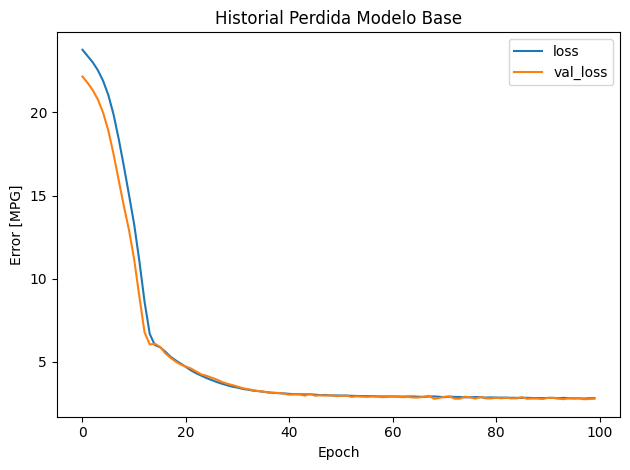

In [142]:
plt.plot(history_Base.history['loss'], label='loss')
plt.plot(history_Base.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial Perdida Modelo Base")
plt.legend()
plt.tight_layout()
plt.savefig("Perdida_Modelo_Base.png")

In [143]:
test_res['Modelo_Base'] = modelo_base.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [144]:
test_res

{'Modelo_Base': 2.668816328048706}

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


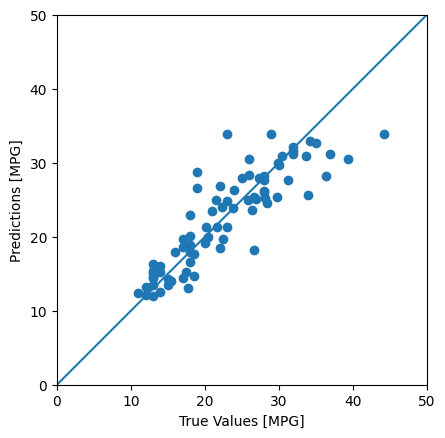

In [145]:
test_pred_base = modelo_base.predict(test_X[Variables]).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred_base)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims)

## Modelos Distintas Neuronas

### 16 Neuronas

In [146]:
modelo_16_Neuronas = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [147]:
modelo_16_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [148]:
modelo_16_Neuronas.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 9 (40.00 B)

In [149]:
%%time
history_16_Neuronas = modelo_16_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 23.9112 - val_loss: 22.5362
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.3041 - val_loss: 22.4122
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.7169 - val_loss: 22.2944
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.5014 - val_loss: 22.1707
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.6742 - val_loss: 22.0375
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.3547 - val_loss: 21.8967
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.3196 - val_loss: 21.7430
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.4926 - val_loss: 21.5684
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.2281 - val_loss: 21.3584
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.4141 - val_loss: 21.1156
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.0242 - val_loss: 20.8468
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.

In [150]:
test_res['Modelo_16_Neuronas'] = modelo_16_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [151]:
test_res

{'Modelo_Base': 2.668816328048706, 'Modelo_16_Neuronas': 2.7569329738616943}

### 32 Neuronas

In [152]:
modelo_32_Neuronas = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [153]:
modelo_32_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [154]:
modelo_32_Neuronas.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,258 (4.92 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 9 (40.00 B)

In [155]:
%%time
history_32_Neuronas = modelo_32_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 23.7879 - val_loss: 22.6167
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.6612 - val_loss: 22.4001
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.5978 - val_loss: 22.1769
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.9526 - val_loss: 21.9388
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.9098 - val_loss: 21.6710
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.1837 - val_loss: 21.3567
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.1236 - val_loss: 20.9803
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.3688 - val_loss: 20.5139
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.9877 - val_loss: 19.9217
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.7264 - val_loss: 19.1844
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.4191 - val_loss: 18.2626
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20

In [156]:
test_res['Modelo_32_Neuronas'] = modelo_32_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [157]:
test_res

{'Modelo_Base': 2.668816328048706,
 'Modelo_16_Neuronas': 2.7569329738616943,
 'Modelo_32_Neuronas': 2.6882786750793457}

### 64 Neuronas

In [158]:
modelo_64_Neuronas = tf.keras.Sequential([
      norm_base,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
  ])

In [159]:
modelo_64_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [160]:
modelo_64_Neuronas.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [165]:
%%time
history_64_Neuronas = modelo_64_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 23.8442 - val_loss: 22.0173
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.9707 - val_loss: 21.5838
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.1047 - val_loss: 21.0578
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.3518 - val_loss: 20.3586
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.5933 - val_loss: 19.4247
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.3667 - val_loss: 18.1703
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.6617 - val_loss: 16.5840
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.5484 - val_loss: 14.8887
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.5127 - val_loss: 13.3957
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.2516 - val_loss: 11.7657
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.2435 - val_loss: 9.7589
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.893

In [166]:
test_res['Modelo_64_Neuronas'] = modelo_64_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [167]:
test_res

{'Modelo_Base': 2.668816328048706,
 'Modelo_16_Neuronas': 2.7569329738616943,
 'Modelo_32_Neuronas': 2.6882786750793457,
 'Modelo_128_Neuronas': 2.7361502647399902,
 'Modelo_64_Neuronas': 2.705768585205078}

### Graficas

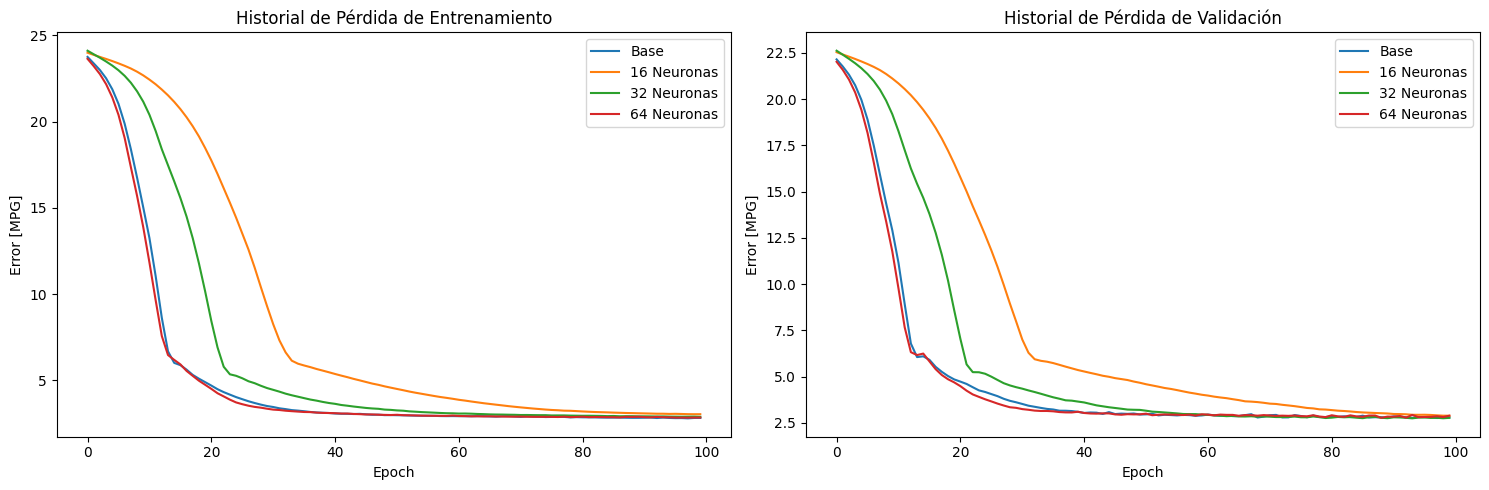

In [170]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_16_Neuronas.history['loss'], label='16 Neuronas')
plt.plot(history_32_Neuronas.history['loss'], label='32 Neuronas')
plt.plot(history_64_Neuronas.history['loss'], label='64 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_16_Neuronas.history['val_loss'], label='16 Neuronas')
plt.plot(history_32_Neuronas.history['val_loss'], label='32 Neuronas')
plt.plot(history_64_Neuronas.history['val_loss'], label='64 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Neuronas.png")

## Modelos Distintas Capas

### 1 Capa

In [171]:
modelo_1_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [172]:
modelo_1_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [173]:
modelo_1_Capa.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394 (1.54 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 9 (40.00 B)

In [174]:
%%time
history_1_Capa = modelo_1_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 23.8861 - val_loss: 22.1806
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.1753 - val_loss: 21.9818
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.4928 - val_loss: 21.7852
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.5102 - val_loss: 21.5849
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.4859 - val_loss: 21.3809
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.2594 - val_loss: 21.1688
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.0958 - val_loss: 20.9441
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.3090 - val_loss: 20.7119
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.1953 - val_loss: 20.4636
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.4860 - val_loss: 20.2048
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.7016 - val_loss: 19.9267
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - los

In [68]:
test_res['Modelo_1_Capa'] = modelo_1_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [175]:
test_res

{'Modelo_Base': 2.668816328048706,
 'Modelo_16_Neuronas': 2.7569329738616943,
 'Modelo_32_Neuronas': 2.6882786750793457,
 'Modelo_128_Neuronas': 2.7361502647399902,
 'Modelo_64_Neuronas': 2.705768585205078}

### 5 Capas

In [176]:
modelo_5_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [177]:
modelo_5_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [178]:
modelo_5_Capa.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,034 (66.54 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 9 (40.00 B)

In [179]:
%%time
history_5_Capa = modelo_5_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 23.4201 - val_loss: 21.8723
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.1859 - val_loss: 20.4949
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.0350 - val_loss: 16.7049
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.2425 - val_loss: 10.0486
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.2432 - val_loss: 9.0529
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.1463 - val_loss: 5.2651
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.6056 - val_loss: 4.8783
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.1100 - val_loss: 4.7167
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7671 - val_loss: 4.2710
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4322 - val_loss: 4.0610
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1314 - val_loss: 3.9260
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1102 - val_loss

In [180]:
test_res['Modelo_5_Capa'] = modelo_5_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [181]:
test_res

{'Modelo_Base': 2.668816328048706,
 'Modelo_16_Neuronas': 2.7569329738616943,
 'Modelo_32_Neuronas': 2.6882786750793457,
 'Modelo_128_Neuronas': 2.7361502647399902,
 'Modelo_64_Neuronas': 2.705768585205078,
 'Modelo_5_Capa': 2.787456512451172}

### 10 Capas

In [182]:
modelo_10_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [183]:
modelo_10_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [184]:
modelo_10_Capa.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,834 (147.79 KB)

 Trainable params: 37,825 (147.75 KB)

 Non-trainable params: 9 (40.00 B)

In [185]:
%%time
history_10_Capa = modelo_10_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 23.8986 - val_loss: 21.8456
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.3297 - val_loss: 18.1931
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.8894 - val_loss: 14.2264
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.2195 - val_loss: 8.6300
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.2073 - val_loss: 4.9335
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2127 - val_loss: 4.3309
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7137 - val_loss: 4.1938
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0317 - val_loss: 3.5207
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9019 - val_loss: 3.9279
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5894 - val_loss: 3.1088
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2170 - val_loss: 3.5751
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3151 - val_loss: 

In [186]:
test_res['Modelo_10_Capa'] = modelo_10_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [187]:
test_res

{'Modelo_Base': 2.668816328048706,
 'Modelo_16_Neuronas': 2.7569329738616943,
 'Modelo_32_Neuronas': 2.6882786750793457,
 'Modelo_128_Neuronas': 2.7361502647399902,
 'Modelo_64_Neuronas': 2.705768585205078,
 'Modelo_5_Capa': 2.787456512451172,
 'Modelo_10_Capa': 2.991536855697632}

### Gráficas

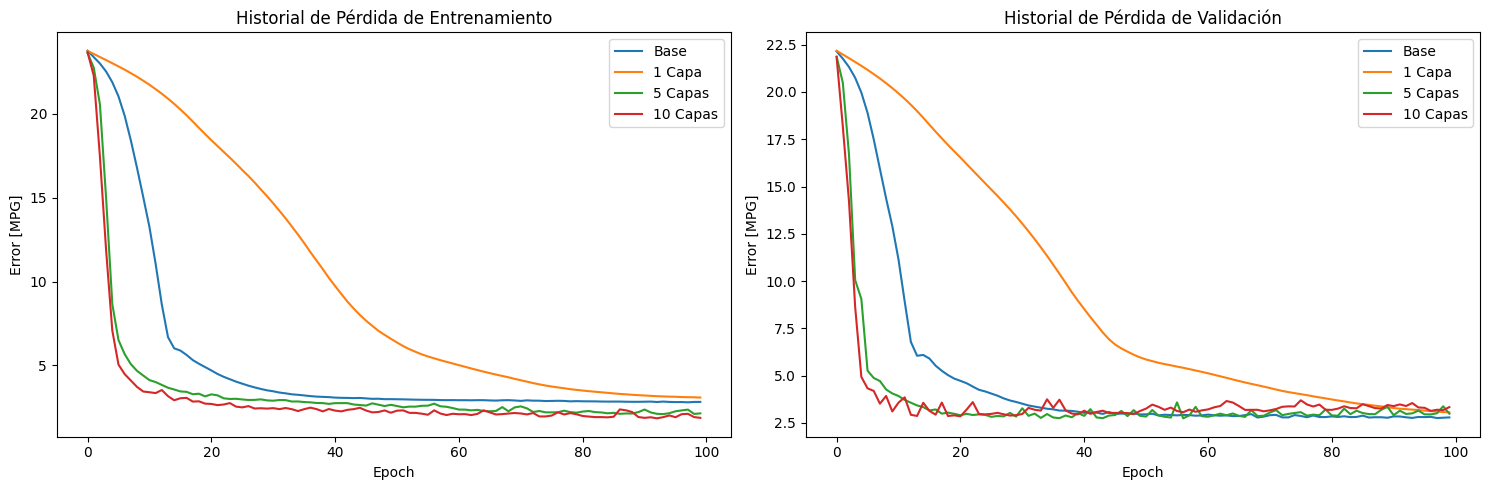

In [188]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_1_Capa.history['loss'], label='1 Capa')
plt.plot(history_5_Capa.history['loss'], label='5 Capas')
plt.plot(history_10_Capa.history['loss'], label='10 Capas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_1_Capa.history['val_loss'], label='1 Capa')
plt.plot(history_5_Capa.history['val_loss'], label='5 Capas')
plt.plot(history_10_Capa.history['val_loss'], label='10 Capas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Capas.png")

## Modelos Distintas Funciones Activación

### TanH

In [189]:
modelo_TanH = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='tanh'),
      tf.keras.layers.Dense(64, activation='tanh'),
      tf.keras.layers.Dense(1)
  ])

modelo_TanH.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [190]:
modelo_TanH.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [191]:
%%time
history_TanH = modelo_TanH.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_TanH'] = modelo_TanH.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 23.8691 - val_loss: 22.3304
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.9566 - val_loss: 22.2217
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.4004 - val_loss: 22.0767
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.0095 - val_loss: 21.8681
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.8833 - val_loss: 21.5867
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.0709 - val_loss: 21.2055
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 21.6212 - val_loss: 20.7018
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.3805 - val_loss: 20.0483
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.0552 - val_loss: 19.1632
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.4957 - val_loss: 18.0642
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.1573 - val_loss: 16.4910
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1

{'Modelo_Base': 2.668816328048706,
 'Modelo_16_Neuronas': 2.7569329738616943,
 'Modelo_32_Neuronas': 2.6882786750793457,
 'Modelo_128_Neuronas': 2.7361502647399902,
 'Modelo_64_Neuronas': 2.705768585205078,
 'Modelo_5_Capa': 2.787456512451172,
 'Modelo_10_Capa': 2.991536855697632,
 'Modelo_TanH': 2.8448197841644287}

### Sigmoide

In [192]:
modelo_Sig = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(1)
  ])

modelo_Sig.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [193]:
modelo_Sig.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [194]:
%%time
history_Sig = modelo_Sig.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_Sig'] = modelo_Sig.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 23.2316 - val_loss: 21.1579
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.1383 - val_loss: 20.2817
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.9656 - val_loss: 19.4372
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.2970 - val_loss: 18.6362
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.5199 - val_loss: 17.8863
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.5291 - val_loss: 17.1907
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.8276 - val_loss: 16.5498
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.2896 - val_loss: 15.9572
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.2994 - val_loss: 15.4082
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.8134 - val_loss: 14.8932
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.8282 - val_loss: 14.4040
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.

{'Modelo_Base': 2.668816328048706,
 'Modelo_16_Neuronas': 2.7569329738616943,
 'Modelo_32_Neuronas': 2.6882786750793457,
 'Modelo_128_Neuronas': 2.7361502647399902,
 'Modelo_64_Neuronas': 2.705768585205078,
 'Modelo_5_Capa': 2.787456512451172,
 'Modelo_10_Capa': 2.991536855697632,
 'Modelo_TanH': 2.8448197841644287,
 'Modelo_Sig': 3.352879762649536}

### Softmax

In [195]:
modelo_Soft = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='softmax'),
      tf.keras.layers.Dense(64, activation='softmax'),
      tf.keras.layers.Dense(1)
  ])

modelo_Soft.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [196]:
modelo_Soft.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [197]:
%%time
history_Soft = modelo_Soft.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_Soft'] = modelo_Soft.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 23.7167 - val_loss: 22.4445
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.9809 - val_loss: 22.4260
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.8321 - val_loss: 22.4075
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.9775 - val_loss: 22.3890
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.6482 - val_loss: 22.3705
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.0094 - val_loss: 22.3519
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.7787 - val_loss: 22.3334
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.7399 - val_loss: 22.3149
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.4742 - val_loss: 22.2964
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.4800 - val_loss: 22.2778
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.8363 - val_loss: 22.2592
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2

{'Modelo_Base': 2.668816328048706,
 'Modelo_16_Neuronas': 2.7569329738616943,
 'Modelo_32_Neuronas': 2.6882786750793457,
 'Modelo_128_Neuronas': 2.7361502647399902,
 'Modelo_64_Neuronas': 2.705768585205078,
 'Modelo_5_Capa': 2.787456512451172,
 'Modelo_10_Capa': 2.991536855697632,
 'Modelo_TanH': 2.8448197841644287,
 'Modelo_Sig': 3.352879762649536,
 'Modelo_Soft': 20.883609771728516}

### Gráficas

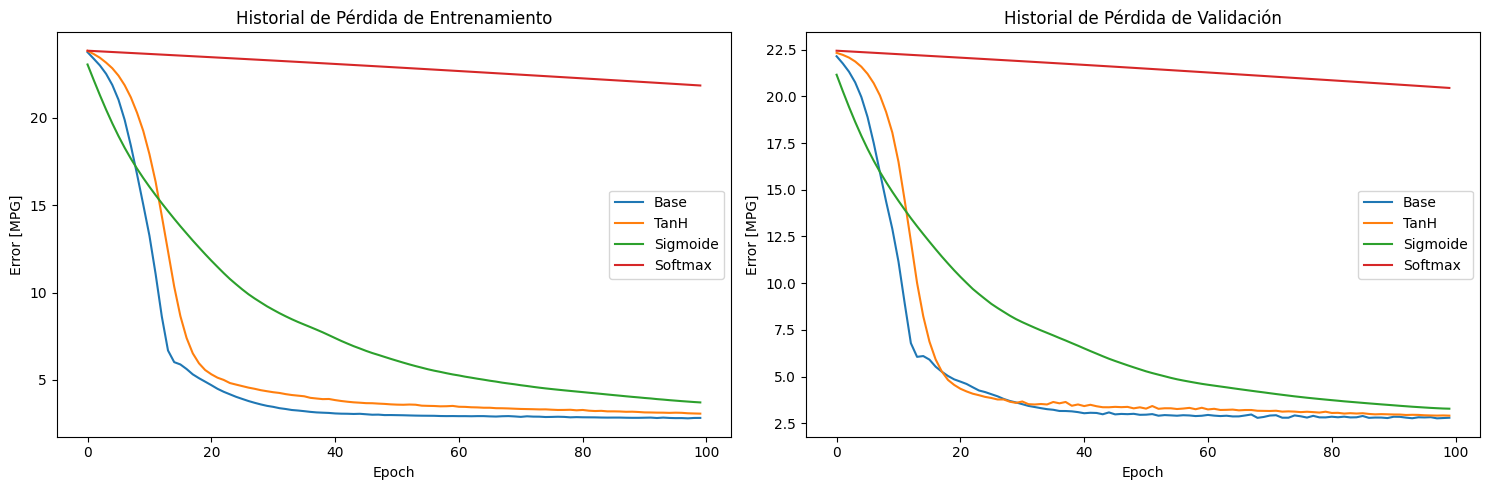

In [198]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_TanH.history['loss'], label='TanH')
plt.plot(history_Sig.history['loss'], label='Sigmoide')
plt.plot(history_Soft.history['loss'], label='Softmax')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_TanH.history['val_loss'], label='TanH')
plt.plot(history_Sig.history['val_loss'], label='Sigmoide')
plt.plot(history_Soft.history['val_loss'], label='Softmax')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Funcion.png")